# Project Business Statistics: E-news Express



## Define Problem Statement and Objectives

##### Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

##### Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?
 

##### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment)
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or not
- language_preferred - Language chosen by the user to view the landing page
 

## Import all the necessary libraries

In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [93]:
# to load the dataset
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.shape

(100, 6)

The dataset has 100 rows and 6 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 4 object type column and 2 numerical type column.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


The average time spent on the page is 5.38 mintues.

The minimum and maximum time spent on the page is 0.19 and 10.71 minutes respectively

In [14]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in any of the column

In [17]:
df.duplicated().sum()

0

There are no duplicated values.

### Univariate Analysis

#### User_id

In [26]:
df['user_id'].value_counts().sum()

100

There are 100 unique users.

#### Groups

In [21]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

The control group and treatment group has 50 users each.

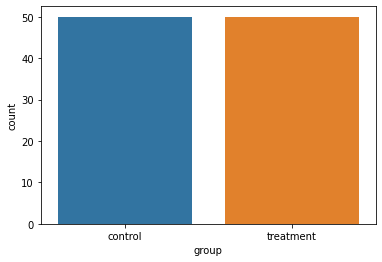

In [42]:
sns.countplot(data=df,x='group')
plt.show()

#### Landing_page

In [22]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

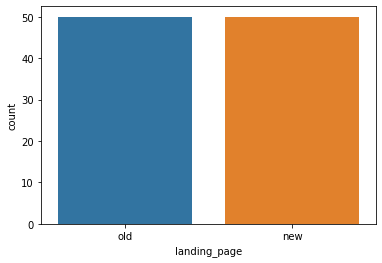

In [43]:
sns.countplot(data=df,x='landing_page')
plt.show()

The number of users on the old and the new landing page are equal

#### Converted

In [23]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

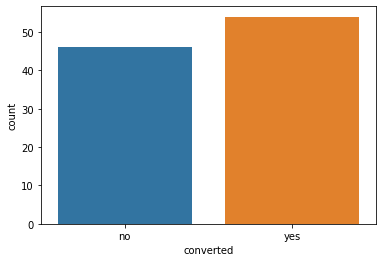

In [77]:
sns.countplot(data=df,x='converted')
plt.show()

Out of 100 users, 56 of them were converted.

#### Language_preferred

In [24]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

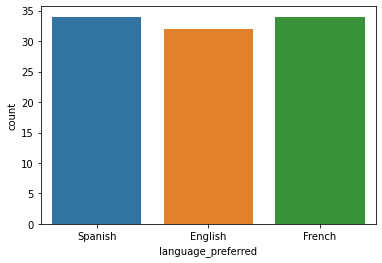

In [45]:
sns.countplot(data=df,x='language_preferred')
plt.show()

French and Spanish are the most preferred languages with 34 users each, followed by English language which was preferred by 32 users

#### Time_spent_on_the_page

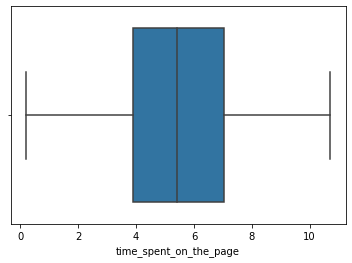

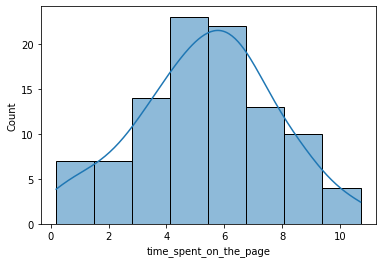

In [29]:
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

sns.histplot(data=df, x='time_spent_on_the_page',kde=True)
plt.show()

The time spent on the page is normally distributed with a mean of about 5.4 minutes

### Bivariate Analysis

#### Landing_page vs Time_spent_on_the_page

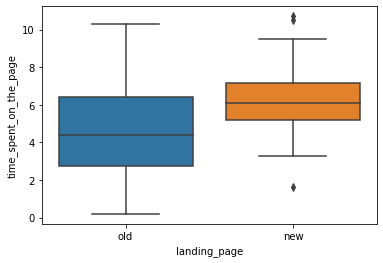

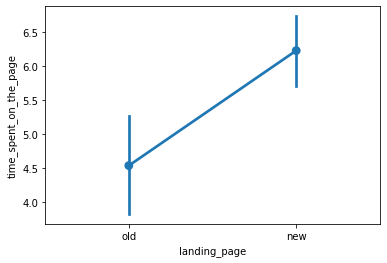

In [37]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

sns.pointplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

It is observed that users spend more time on the new landing page than on the old landing page, with the mean time spent of about 6.2minutes and 4.5minutes respectively.

#### Converted vs Time_spent_on_the_page

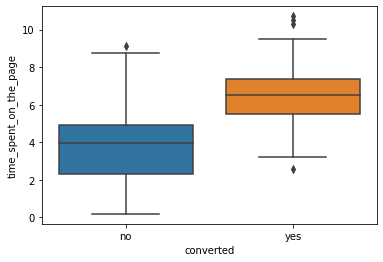

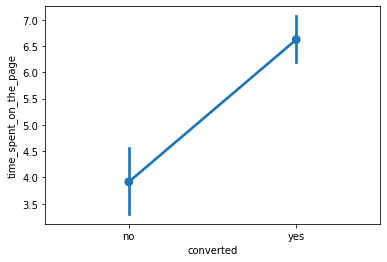

In [40]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()

sns.pointplot(data=df, x='converted', y='time_spent_on_the_page')
plt.show()

- There are outliers in this observation

- Also,it has been seen that the more time spent on the page, the more the chances of getting converted.

#### Language_preferred vs Time_spent_on_the_page

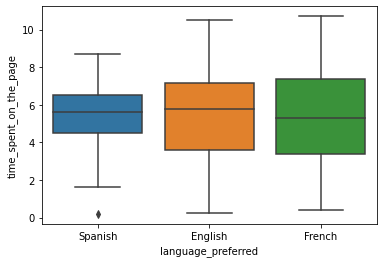

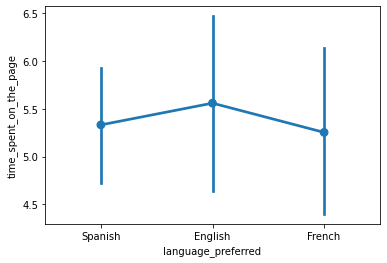

In [41]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

sns.pointplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

Users who preferred English language spent more time on the page, followed by Spanish language and then French language preferred users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

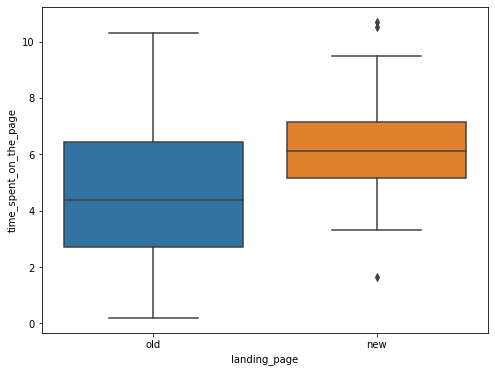

In [46]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

- It is observed that users spend more time on the new landing page than on the old landing page, with the mean time spent of about 6.2minutes and 4.5minutes respectively. 

- Outliers exist for the users on the new landing page

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time users spend on new landing page and on old landing page are equal.

$H_a:$ The mean time users spend on new landing page is greater than the mean time spent on old landing page.

> Let $\mu_1$ be the mean time users spend on new landing page. <br>
Let $\mu_2$ be the mean time users spend on old landing page.

Mathematically, the above formulated hypotheses can be written as:




 > $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we use the 2-sample independent t-test.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05 .

### Step 4: Collect and prepare data

In [54]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']


In [80]:
print('The sample mean of the time spent on the new page is:', round(time_spent_new.mean(),2) , 'minutes')
print('The sample mean of the time spent on the old page is:', round(time_spent_old.mean(),2) , 'minutes')

print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample mean of the time spent on the new page is: 6.22 minutes
The sample mean of the time spent on the old page is: 4.53 minutes
The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


Based on the result above, the standard deviations of the two groups are unequal.

### Step 5: Calculate the p-value

In [91]:
from scipy.stats import ttest_ind 

# to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [58]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time users spend on new landing page is greater than the mean time spent on old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

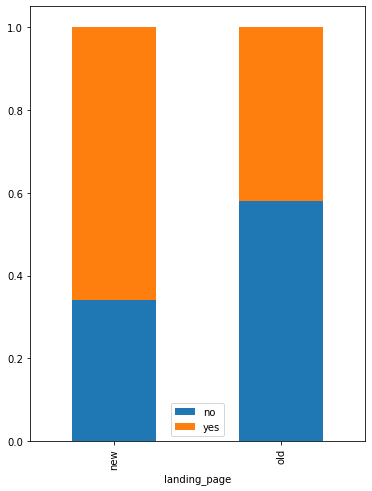

In [82]:
# to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

More users where converted on the new page (over 65%) compared to the old page which had only about 40% conversion.

### Step 1: Define the null and alternate hypotheses

$H_0:$ The proportion of users who visits the new page and gets converted and the proportion of users who visits the old page and gets converted is equal.

$H_a:$ The proportion of users who visits the new page and gets converted is larger than the proportion of users who visits the old page and gets converted.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, we use the 2-sample z-test.

### Step 3: Decide the significance level


As given in the problem statement, we select  𝛼=0.05 .

### Step 4: Collect and prepare data

In [94]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [62]:
# to import the required function
from statsmodels.stats.proportion import proportions_ztest  

# to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with  𝛼 

In [63]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of users who visits the new page and gets converted is larger than the proportion of users who visits the old page and gets converted.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

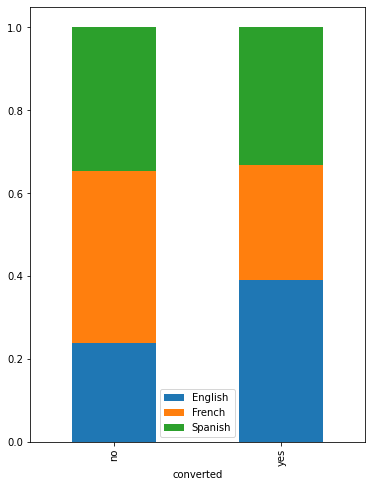

In [83]:
# plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

Users who preferred English language were mostly converted, followed by Spanish and then French

### Step 1: Define the null and alternate hypothes

$H_0:$ Number of users converted is independent of language preferred

$H_a:$ Number of users converted is not independent of language preferred

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. we will use the Chi-square test of independence

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05 .

### Step 4: Collect and prepare data

In [84]:
# to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [95]:
# import the required function
from scipy.stats import chi2_contingency  

# calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)  

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [71]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference

Since the pvalue is > 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that conversion is independent of language preferred.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [72]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

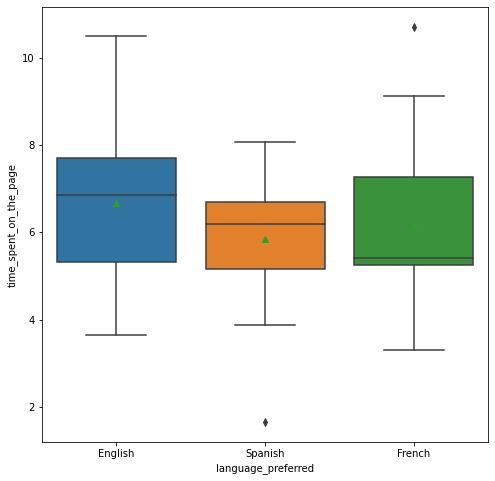

In [88]:
# to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [96]:
# to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

> $H_0$ : The mean time spent on the new page with respect to different language users is equal <br>
> $H_a$ : At least one of the mean time spent on the new page with respect to different language users is different.

### Step 2: Select Appropriate test

This is a problem concerning three population means. One-way ANOVA is an appropriate test

### Step 3: Decide the significance level

As given in the problem statement, we select 𝛼=0.05 .

### Step 4: Collect and prepare data

In [74]:
# create a subsetted data frame of the time spent on the new page by English, French and Spanish language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [97]:
# to import the required function
from scipy.stats import f_oneway 

# to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [76]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the pvalue is > 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new page with respect to different language user is equal. 

## Conclusion and Business Recommendations

- Based on the sample data, the average time spent on the new page is 6.22 minutes and 4.53 minutes on the old page.

- There was enough statistical evidence to say that users spent more time on the new landing page than on the old page.

- It was also observed that the more time spent on the page, the more the chances of getting converted.

- There was enough evidence to say that the proportion of users who visits the new page and gets converted is larger than the proportion of users who visits the old page and gets converted.

- There wasn't enough statistical evidence to say that language preferred had any significant relationship with the rate of conversion, although more users that preferred English language were converted. The size of the sample can be increased to make the conclusion from the statistical test more reliable.

- The company should be aware that it has taken the right step in creating the new landing page which has a better outline & more relevant content as it has shown to get more users interest.


___